# BERTopic Tutorial

This tutorial is a compilation of the BERTopic documetation, the corresponding paper, the SBERT documentation and own code to give an introduction to topic modeling with BERTopic. This should enable you to carry out practical experiments with your own data. 🚀

## Introduction

BERTopic leverages 🤗 transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

We can use topic modeling, e.g., for:

- Clustering : Grouping related papers based on their topics
- Automatic Summarization : Extracting main topics from a vast number of papers
- Research Gap Identification : Detecting underexplored areas by analyzing topic distributions
- Interdisciplinary Studies : Finding connections between different research domains
- Recommendation Systems – Suggesting relevant papers based on topic similarities

## Main Representation of the Algotihm 

Step 1. Embedding  
Step 2. Dimensionality Reduction  
Step 3. Clustering  
Step 4. Tokenizer  
Step 5. Weighting scheme  

NOTE: All steps are independent and modulare. E.g., you so can use a variety of clustering models (k-Means, HDBSCAN...)

### 1. Embedding 

Embedding refers to the process of converting high-dimensional data (like words) into a lower-dimensional, dense numerical representation. These representations (vectors), capture meaningful relationships between entities, making it easier for AI models to understand and process data efficiently.

With BERTopic and Sentence Transformers we try to capture the meaning of whole sentences or documents. According to the documentation, sentences or entire documents can be used for embedding. We can use multiple pre-trained sentence-transformers. Here is a list:

https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

<div style="border: 1px solid white; padding: 10px;">
DEGRESSION - Transformers:

A Transformer is a deep learning architecture introduced in the paper "Attention Is All You Need" by Vaswani et al. (2017). It revolutionized natural language processing (NLP) by replacing older models like RNNs and LSTMs with a more efficient mechanism: self-attention.

Self-Attention Mechanism
- Each word (or token) in a sentence attends to all other words, learning contextual relationships dynamically.  

Positional Encoding
- Since Transformers don’t process words sequentially like RNNs, they need a way to understand the order of words.
- Positional encoding adds information about word order to the embeddings.  

Multi-Head Attention
- Instead of just one self-attention mechanism, multiple attention heads allow the model to focus on different parts of a sentence simultaneously.
</div>

The embedding are primarily used to cluster semantically similar documents and not directly used in generating the topics...

### 2. Dimensionality Reduction 

After having created our numerical representations of the documents we have to reduce the dimensionality of these representations. Cluster models typically have difficulty handling high dimensional data due to the curse of dimensionality. There are great approaches that can reduce dimensionality, such as PCA, but as a default UMAP is selected in BERTopic. It is a technique that can keep some of a dataset's local and global structure when reducing its dimensionality. This structure is important to keep as it contains the information necessary to create clusters of semantically similar documents.

### 3. Cluster Documents

After having reduced our embeddings, we can start clustering our data. For that, we leverage a density-based clustering technique, HDBSCAN. It can find clusters of different shapes and has the nice feature of identifying outliers where possible. As a result, we do not force documents into a cluster where they might not belong. This will improve the resulting topic representation as there is less noise to draw from.

NOTE: Paper of HDBSCAN: Leland McInnes, John Healy, and Steve Astels. 2017. hdbscan: Hierarchical density based clustering. The Journal of Open Source Software, 2(11):205.

<div style="border: 1px solid white; padding: 10px;">
DEGRESSION - HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise):

It works in four main steps:

1. Construct Mutual Reachability Graph – This distance metric considers both the core distance (the distance to the k-th nearest neighbor) and the mutual reachability distance between points.
2. Generate Minimum Spanning Tree (MST) – Builds a MST from the distance graph, capturing cluster connectivity.
3. Hierarchical Clustering – Forms a hierarchy by progressively removing longest edges in the MST.
4. Condense and Extract Stable Clusters – instead of manually selecting a clustering level, HDBSCAN automatically determines the most stable clusters by analyzing the persistence of clusters in the hierarchy. Clusters that persist across different levels of granularity are considered meaningful.
5. Identifying Noise - HDBSCAN automatically classifies outliers as noise when they do not belong to any stable cluster.

</div>

### 4. Tokenizer 

We want a topic representation technique that makes little to no assumption on the expected structure of the clusters. To do this, we first combine all documents in a cluster into a single document. That, very long, document then represents the cluster. Then, we can count how often each word appears in each cluster. This generates something called a bag-of-words representation in which the frequency of each word in each cluster can be found. This bag-of-words representation is therefore on a cluster level and not on a document level. This distinction is important as we are interested in words on a topic level (i.e., cluster level). By using a bag-of-words representation, no assumption is made concerning the structure of the clusters. 

NOTE: detailed informations here: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

### 5. Weighting scheme  

From the generated bag-of-words representation, we want to know what makes one cluster different from another. Which words are typical for cluster 1 and not so much for all other clusters? 

The topic representations are modeled based on the documents in each cluster where each cluster will
be assigned one topic. For each topic, we want to know what makes one topic, based on its cluster-
word distribution, different from another? For this purpose, we can modify TF-IDF (Term Frequency-Inverse Document Frequency), a measure for representing the importance of a word to a document, such that it allows for a representation of a term’s importance to a topic instead.

The classic TF-IDF procedure combines two statistics, term frequency, and inverse document
frequency: 

$$
W_{t,d}=tf_{t,d} \cdot log(\frac{N}{df_t})
$$

Where the term frequency models the frequency of term $t$ in document $d$. The inverse document frequency measures how much information a term provides to a document and is calculated by taking the logarithm of the number of documents in a corpus $N$ divided by the total number of documents that contain $t$.

We generalize this procedure to clusters of documents: 

$$
W_{t,c}=tf_{t,c} \cdot log(1+\frac{A}{tf_t})
$$

Where the term frequency models the frequency of term $t$ in a class $c$ or in this instance. Here, the class $c$ is the collection of documents concatenated into a single document for each cluster. Then, the inverse document frequency is replaced by the inverse class frequency to measure how much information a term provides to a class. It is calculated by taking the logarithm of the average number of words per class $A$ divided by the frequency of term $t$ across all classes. To output only positive values, we add one to the division within the logarithm. Thus, this class-based TF-IDF procedure models the importance of words in clusters instead of individual documents. This allows us to generate topic-word distributions for each cluster of documents.

In other words, if we extract the most important words per cluster, we get descriptions of topics!

### Further Informations 

- Paper : https://arxiv.org/abs/2203.05794
- Project Homepage : https://maartengr.github.io/BERTopic/index.html

## Tasks

1. Try to run the whole notebook with all dependencies. 
2. Play around with some parameters:
    - Load more data by changing the slicer to a larger number (Loading Data - line 2)
    - Pass another LLM (Training - line 2)
    - change some paramters (Training)  
        - n_neighbors = controls the balance between local and global structure; lower value local structure focus; higher values global structure focus. It determines how many nearest neighbors are considered when constructing the initial high-dimensional graph.
        - min_cluster_size = minimum number of points required to form a cluster. Low values (e.g., 5–15): Detects smaller, fine-grained clusters but may increase noise. Higher values (e.g., 50–100): Produces larger, more stable clusters but may miss small but meaningful groups.
3. Load your own Data or the CShorten/ML-ArXiv-Papers and transform a new topic afterwards so find maybee a research gap 
4. or compare the results of the different new_topic_text inputs in "Predictions"

# Installation

In [61]:
%%capture
!pip install bertopic
!pip install datasets
!pip isntall PyPDF2
!pip install scikit-learn
!pip install matplotlib


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

HINT: We pobably need to restart the notebook after the installations

## Loading Packages

In [62]:
import bertopic as bt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from hdbscan import HDBSCAN
from datasets import load_dataset
import numpy as np
from matplotlib import pyplot as plt
from PyPDF2 import PdfReader
import os 
from umap import UMAP

## Loading Data

In [63]:
random_seed = 42
# data = load_dataset("newsgroup", '18828_alt.atheism')["train"]["text"]
data = load_dataset("CShorten/ML-ArXiv-Papers")["train"]["abstract"][0:500]
'''
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    #text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
    text = reader.pages[0].extract_text()

    return text

data = []
path_data = "/Users/Fabian/Documents/DataScience/Phd/Disertation/Research/Paper/" # TODO change to your path

for pdf in os.listdir(path_data):
    if pdf[-3:] == "pdf":
        pdf_text = extract_text_from_pdf(path_data + pdf)
        data.append(pdf_text)
    else:
        print("file is not a pdf")
'''
print(f"you load {len(data)} different paper/docs")

you load 500 different paper/docs


## Training

We can change the embedding model to any other models from the sentence-transformers here:

https://www.sbert.net/docs/sentence_transformer/pretrained_models.html



In [64]:
# Step 1 - Extract embeddings
embedding_model = "all-MiniLM-L6-v2" # We can change to a larger model (all-mpnet-base-v2) or any other model from the list above.
'''
NOTE: 
  all-MiniLM-L6-v2
    - Size : 22.7M params
    - Speed : 14,200 sentences per sec.
  all-mpnet-base-v2
    - Size : 109M params
    - Speed : 2,800 sentences per sec.
  
'''

# Step 2 - Reduce dimensionality
umap_model = UMAP(
    n_neighbors=15, 
    n_components=2, 
    min_dist=0.0, 
    metric='cosine',
    random_state=random_seed
    )
# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(
    min_cluster_size=5, 
    metric='euclidean', 
    cluster_selection_method='eom', 
    prediction_data=True,
    )
# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")
# Step 5 - Create topic representation
ctfidf_model = bt.vectorizers.ClassTfidfTransformer()
# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = bt.representation.KeyBERTInspired()

# All steps together
topic_model = bt.BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model, # Step 6 - (Optional) Fine-tune topic representations
  verbose=True,
  language="english"
)

topics, probs = topic_model.fit_transform(data)

2025-02-25 11:59:16,547 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 16/16 [00:22<00:00,  1.43s/it]
2025-02-25 11:59:41,525 - BERTopic - Embedding - Completed ✓
2025-02-25 11:59:41,527 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-25 11:59:42,482 - BERTopic - Dimensionality - Completed ✓
2025-02-25 11:59:42,484 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-25 11:59:42,510 - BERTopic - Cluster - Completed ✓
2025-02-25 11:59:42,522 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-25 11:59:49,728 - BERTopic - Representation - Completed ✓


In [65]:
freq = topic_model.get_topic_info() 
freq.head(3)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,118,-1_classifiers_classification_classifier_networks,"[classifiers, classification, classifier, netw...",[ We have proposed a model based upon flockin...
1,0,108,0_generalization_models_markov_algorithms,"[generalization, models, markov, algorithms, e...",[ The problem of statistical learning is to c...
2,1,30,1_adaptive_reinforcement_markov_bayesian,"[adaptive, reinforcement, markov, bayesian, ag...",[ General purpose intelligent learning agents...


HINT: -1 refers to all outliers and should typically be ignored.

With visualize_barchart() we can visualize our topics for a first overview

In [66]:
topic_model.visualize_barchart()

Now lets have a look on the clustered topics with visualize_topics()

In [67]:
topic_model.visualize_topics()

We can also plot a more detailed overview where we can visualize the documents and topics to see if they were assigned correctly or whether they make sense.

In [68]:
topic_model.visualize_documents(data)

In [69]:
topic_model.visualize_heatmap()

## Prediction

Let's have a look on the most similar topic given new_topic_text...

In [70]:
topic_embeddings = topic_model.topic_embeddings_

# TODO adapt the text to your own and compare multipble cosine similarities...
new_topic_text = "I love to play soccer"
new_topic_text = "AI is good for clustering and predictions"
new_topic_text = "Reinforcement Learning, optimization, bandit"

new_topic_embedding = topic_model._extract_embeddings([new_topic_text], method="document")
similarities = cosine_similarity(new_topic_embedding, topic_embeddings)
most_similar_topic = np.argmax(similarities)
similarity_score = similarities[0][most_similar_topic]

print(f"Most similar topic: {most_similar_topic}, Similarity Score: {similarity_score}")


Most similar topic: 2, Similarity Score: 0.6836685538291931


Check all the similarities 

<BarContainer object of 22 artists>

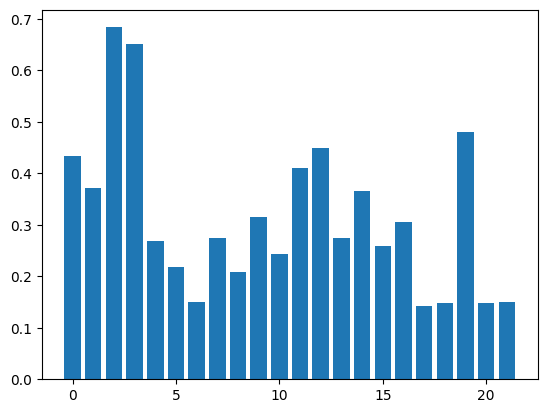

In [71]:
plt.bar([i for i in range(len(similarities[0]))], similarities[0])

HINT: know you can go back to the figure created with topic_model.visualize_topics() and topic_model.visualize_documents() and find the most similar topic and also find some similar topics